# March Data Crunch Madness - Black Boxers

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV

In [2]:
df = pd.read_csv('NCAA_Tourney_2021.csv')
df.shape

(3445, 100)

# Feature Selection

### Seed Differential

In [3]:
dfsample1 = df.copy()
dfsample1['seed_diff'] = dfsample1['team1_seed'] - dfsample1['team2_seed']

### Three Point Differential

In [4]:
dfsample1["3_point_diff"] = (dfsample1["team1_fg3pct"]+dfsample1["team2_oppfg3pct"])/2-(dfsample1["team2_fg3pct"]+dfsample1['team1_oppfg3pct'])/2
dfsample2 = dfsample1.copy()

### Checking Correlation with DV

In [5]:
dfsample3 = df.copy()
dfsample3 = dfsample3[['team1_id', 'team2_id', 'game_id','team1_pt_school_ncaa','team1_pt_overall_ncaa','team1_pt_school_s16','team1_pt_overall_s16','team1_pt_school_ff','team1_pt_overall_ff','team1_pt_career_school_wins',
             'team1_pt_career_school_losses','team1_pt_career_overall_wins','team1_pt_career_overall_losses','team1_pt_team_season_wins','team1_pt_team_season_losses','team1_pt_coach_season_wins','team1_pt_coach_season_losses',
            'team2_pt_school_ncaa','team2_pt_overall_ncaa','team2_pt_school_s16','team2_pt_overall_s16','team2_pt_school_ff','team2_pt_overall_ff','team2_pt_career_school_wins','team2_pt_career_school_losses','team2_pt_career_overall_wins','team2_pt_career_overall_losses','team2_pt_team_season_wins',
             'team2_pt_team_season_losses','team2_pt_coach_season_wins','team2_pt_coach_season_losses','team1_fg2pct','team1_fg3pct','team1_ftpct','team1_blockpct','team1_oppfg2pct','team1_oppfg3pct','team1_oppftpct',
             'team1_oppblockpct','team1_f3grate','team1_oppf3grate','team1_arate','team1_opparate','team1_stlrate','team1_oppstlrate','team2_fg2pct','team2_fg3pct','team2_ftpct','team2_blockpct','team2_oppfg2pct','team2_oppfg3pct','team2_oppftpct','team2_oppblockpct','team2_f3grate','team2_oppf3grate','team2_arate',
             'team2_opparate','team2_stlrate','team2_oppstlrate','team1_tempo','team1_adjtempo','team1_oe','team1_adjoe','team1_de','team1_adjde','team2_tempo','team2_adjtempo','team2_oe','team2_adjoe','team2_de','team2_adjde']]
#dfsample3

nvar_list = ['team1_pt_school_ncaa','team1_pt_overall_ncaa','team1_pt_school_s16','team1_pt_overall_s16','team1_pt_school_ff','team1_pt_overall_ff','team1_pt_career_school_wins',
             'team1_pt_career_school_losses','team1_pt_career_overall_wins','team1_pt_career_overall_losses','team1_pt_team_season_wins','team1_pt_team_season_losses','team1_pt_coach_season_wins','team1_pt_coach_season_losses',
            'team2_pt_school_ncaa','team2_pt_overall_ncaa','team2_pt_school_s16','team2_pt_overall_s16','team2_pt_school_ff','team2_pt_overall_ff','team2_pt_career_school_wins','team2_pt_career_school_losses','team2_pt_career_overall_wins','team2_pt_career_overall_losses','team2_pt_team_season_wins',
             'team2_pt_team_season_losses','team2_pt_coach_season_wins','team2_pt_coach_season_losses','team1_fg2pct','team1_fg3pct','team1_ftpct','team1_blockpct','team1_oppfg2pct','team1_oppfg3pct','team1_oppftpct',
             'team1_oppblockpct','team1_f3grate','team1_oppf3grate','team1_arate','team1_opparate','team1_stlrate','team1_oppstlrate','team2_fg2pct','team2_fg3pct','team2_ftpct','team2_blockpct','team2_oppfg2pct','team2_oppfg3pct','team2_oppftpct','team2_oppblockpct','team2_f3grate','team2_oppf3grate','team2_arate',
             'team2_opparate','team2_stlrate','team2_oppstlrate','team1_tempo','team1_adjtempo','team1_oe','team1_adjoe','team1_de','team1_adjde','team2_tempo','team2_adjtempo','team2_oe','team2_adjoe','team2_de','team2_adjde']
#df_std : standardize dataset
df_std = dfsample3.copy()
df_std[nvar_list] = (dfsample3[nvar_list] - dfsample3[nvar_list].mean())/dfsample3[nvar_list].std()

df4heatmaps = df_std
# Compute the correlation matrix 
#corr = df4heatmaps.corr()
# Print the correlation matrix
#print(corr)
# Draw the heatmap
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Mean Analysis - Eliminating Multicollinearity

In [6]:
dfsample4 = dfsample3.copy()
attri_todrop = ['game_id']
dfsample4 = dfsample3.drop(columns=attri_todrop)
column_list = dfsample4.columns
for i in range(0,len(column_list)-1):
    for j in range(i+1,len(column_list)):
        col_cor = dfsample4[column_list[i]].corr(dfsample4[column_list[j]])
        if col_cor>=0.8:
            print(column_list[i],column_list[j])

team1_pt_school_ncaa team1_pt_school_s16
team1_pt_school_ncaa team1_pt_overall_s16
team1_pt_school_ncaa team1_pt_school_ff
team1_pt_school_ncaa team1_pt_career_school_wins
team1_pt_overall_ncaa team1_pt_overall_s16
team1_pt_overall_ncaa team1_pt_career_overall_wins
team1_pt_school_s16 team1_pt_overall_s16
team1_pt_school_s16 team1_pt_school_ff
team1_pt_school_s16 team1_pt_career_school_wins
team1_pt_overall_s16 team1_pt_overall_ff
team1_pt_overall_s16 team1_pt_career_overall_wins
team1_pt_school_ff team1_pt_overall_ff
team1_pt_career_school_wins team1_pt_career_school_losses
team1_pt_career_overall_wins team1_pt_career_overall_losses
team2_pt_school_ncaa team2_pt_overall_ncaa
team2_pt_school_ncaa team2_pt_school_s16
team2_pt_school_ncaa team2_pt_overall_s16
team2_pt_school_ncaa team2_pt_career_school_wins
team2_pt_overall_ncaa team2_pt_school_s16
team2_pt_overall_ncaa team2_pt_overall_s16
team2_pt_overall_ncaa team2_pt_career_overall_wins
team2_pt_school_s16 team2_pt_overall_s16
team2_

In [7]:
highly_corr = ['team1_pt_school_ncaa','team1_pt_school_s16','team1_pt_overall_s16','team1_pt_career_school_losses','team1_pt_school_ff','team1_pt_overall_ff',
               'team2_pt_school_ncaa','team2_pt_school_s16','team2_pt_overall_s16','team2_pt_career_school_losses','team2_pt_school_ff','team2_pt_overall_ff']
dataframe_1 = dfsample3.copy()
dataframe_1 = dfsample3.drop(columns = highly_corr)
dataframe_1.columns

Index(['team1_id', 'team2_id', 'game_id', 'team1_pt_overall_ncaa',
       'team1_pt_career_school_wins', 'team1_pt_career_overall_wins',
       'team1_pt_career_overall_losses', 'team1_pt_team_season_wins',
       'team1_pt_team_season_losses', 'team1_pt_coach_season_wins',
       'team1_pt_coach_season_losses', 'team2_pt_overall_ncaa',
       'team2_pt_career_school_wins', 'team2_pt_career_overall_wins',
       'team2_pt_career_overall_losses', 'team2_pt_team_season_wins',
       'team2_pt_team_season_losses', 'team2_pt_coach_season_wins',
       'team2_pt_coach_season_losses', 'team1_fg2pct', 'team1_fg3pct',
       'team1_ftpct', 'team1_blockpct', 'team1_oppfg2pct', 'team1_oppfg3pct',
       'team1_oppftpct', 'team1_oppblockpct', 'team1_f3grate',
       'team1_oppf3grate', 'team1_arate', 'team1_opparate', 'team1_stlrate',
       'team1_oppstlrate', 'team2_fg2pct', 'team2_fg3pct', 'team2_ftpct',
       'team2_blockpct', 'team2_oppfg2pct', 'team2_oppfg3pct',
       'team2_oppftpct', 't

### Principal Component Analysis

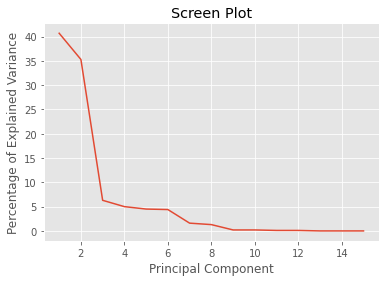

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-348.592018,-229.931577,-55.080246,-149.531934,42.462864
1,-356.012649,-48.518269,-57.298694,104.604300,24.270324
2,-378.717020,464.000945,-51.701006,-77.720386,50.065873
3,-360.866781,53.186261,-54.876773,-139.096309,15.110323
4,-348.210691,-237.227070,-55.586898,-122.053401,36.497974
...,...,...,...,...,...
3440,-109.434490,122.029500,4.020873,28.039266,47.827561
3441,224.738469,385.497880,89.280762,-53.736661,3.011049
3442,308.683484,467.560701,-20.246916,-97.509887,125.263644
3443,243.206119,-34.113563,85.760253,-6.815586,-20.120208


In [8]:
#PCA 
dfpca1=dfsample4.copy()
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca.fit(dfpca1)
x_pca=pca.transform(dfpca1)
x_pca.shape
dfpca2 = pd.DataFrame(x_pca)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.plot(range(1,len(per_var)+1), per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

dfpca3 = dfpca2.copy()
dfpca3.columns =["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15"]
dfpca4 = dfpca3.copy()
to_dropPca = ["PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15"]
dfpca4 = dfpca3.drop(columns= to_dropPca)
dfpca4


### Results from PCA and mean analysis

In [9]:
# TWO DATA FRAMES :

#PCA AND Correlation Dataframes:
P_C_A = dfpca4.copy()
Corr_dataframe = dataframe_1.copy()

In [10]:
Corr_dataframe.columns.values

array(['team1_id', 'team2_id', 'game_id', 'team1_pt_overall_ncaa',
       'team1_pt_career_school_wins', 'team1_pt_career_overall_wins',
       'team1_pt_career_overall_losses', 'team1_pt_team_season_wins',
       'team1_pt_team_season_losses', 'team1_pt_coach_season_wins',
       'team1_pt_coach_season_losses', 'team2_pt_overall_ncaa',
       'team2_pt_career_school_wins', 'team2_pt_career_overall_wins',
       'team2_pt_career_overall_losses', 'team2_pt_team_season_wins',
       'team2_pt_team_season_losses', 'team2_pt_coach_season_wins',
       'team2_pt_coach_season_losses', 'team1_fg2pct', 'team1_fg3pct',
       'team1_ftpct', 'team1_blockpct', 'team1_oppfg2pct',
       'team1_oppfg3pct', 'team1_oppftpct', 'team1_oppblockpct',
       'team1_f3grate', 'team1_oppf3grate', 'team1_arate',
       'team1_opparate', 'team1_stlrate', 'team1_oppstlrate',
       'team2_fg2pct', 'team2_fg3pct', 'team2_ftpct', 'team2_blockpct',
       'team2_oppfg2pct', 'team2_oppfg3pct', 'team2_oppftpct',
  

## Standardizing Variables

In [12]:
#standardizing variables

nvars = ['team1_pt_overall_ncaa', 'team1_pt_career_school_wins',
       'team1_pt_career_overall_wins', 'team1_pt_career_overall_losses',
       'team1_pt_team_season_wins', 'team1_pt_team_season_losses',
       'team1_pt_coach_season_wins', 'team1_pt_coach_season_losses',
       'team2_pt_overall_ncaa', 'team2_pt_career_school_wins',
       'team2_pt_career_overall_wins', 'team2_pt_career_overall_losses',
       'team2_pt_team_season_wins', 'team2_pt_team_season_losses',
       'team2_pt_coach_season_wins', 'team2_pt_coach_season_losses',
       'team1_fg2pct', 'team1_fg3pct', 'team1_ftpct', 'team1_blockpct',
       'team1_oppfg2pct', 'team1_oppfg3pct', 'team1_oppftpct',
       'team1_oppblockpct', 'team1_f3grate', 'team1_oppf3grate', 'team1_arate',
       'team1_opparate', 'team1_stlrate', 'team1_oppstlrate', 'team2_fg2pct',
       'team2_fg3pct', 'team2_ftpct', 'team2_blockpct', 'team2_oppfg2pct',
       'team2_oppfg3pct', 'team2_oppftpct', 'team2_oppblockpct',
       'team2_f3grate', 'team2_oppf3grate', 'team2_arate', 'team2_opparate',
       'team2_stlrate', 'team2_oppstlrate', 'team1_tempo', 'team1_adjtempo',
       'team1_oe', 'team1_adjoe', 'team1_de', 'team1_adjde', 'team2_tempo',
       'team2_adjtempo', 'team2_oe', 'team2_adjoe', 'team2_de', 'team2_adjde']

Corr_dataframe[nvars] = (Corr_dataframe[nvars] - Corr_dataframe[nvars].mean())/Corr_dataframe[nvars].std()

Corr_dataframe

,team1_id,team2_id,game_id,team1_pt_overall_ncaa,team1_pt_career_school_wins,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,...,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde
0,1276,1104,2021-1276-1104,-0.904721,-0.764916,-1.190773,-1.453124,-0.069891,-0.723553,-0.130761,...,0.728115,1.341227,0.010238,-1.239109,2.155986,2.070637,-0.408096,0.311308,-1.013335,-1.895828
1,1276,1400,2021-1276-1400,-0.904721,-0.764916,-1.190773,-1.453124,-0.069891,-0.723553,-0.130761,...,0.728115,1.341227,0.010238,-1.239109,0.414576,0.528661,-0.243247,0.657151,0.177737,-0.586745
2,1276,1199,2021-1276-1199,-0.904721,-0.764916,-1.190773,-1.453124,-0.069891,-0.723553,-0.130761,...,0.728115,1.341227,0.010238,-1.239109,0.650564,0.969869,0.632393,1.078928,0.440166,-0.364994
3,1276,1160,2021-1276-1160,-0.904721,-0.764916,-1.190773,-1.453124,-0.069891,-0.723553,-0.130761,...,0.728115,1.341227,0.010238,-1.239109,-0.642955,-0.402446,0.386283,0.749669,-0.295817,-0.693021
4,1276,1140,2021-1276-1140,-0.904721,-0.764916,-1.190773,-1.453124,-0.069891,-0.723553,-0.130761,...,0.728115,1.341227,0.010238,-1.239109,0.658551,0.127286,0.155494,0.536667,-0.184187,-0.808156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,1260,1243,2018-1260.0-1243.0,-0.904721,-0.358653,-0.434171,0.397173,0.328250,-0.508855,1.523863,...,0.523436,-0.589248,-0.019193,0.087742,-0.531579,-0.684778,0.794721,-0.358267,0.071413,1.230190
3441,1276,1199,2018-1276.0-1199.0,0.454584,0.297620,0.864042,1.402975,0.328250,-0.079460,1.523863,...,1.420980,-0.167009,-0.832852,0.663690,1.355071,1.308537,1.492906,0.048226,0.690127,1.190108
3442,1437,1242,2018-1437.0-1242.0,0.825304,1.198692,0.872311,0.767232,0.427785,-0.723553,1.937519,...,3.664842,1.792178,-0.065688,1.416853,0.568967,0.262864,2.482001,0.893730,0.142803,1.190108
3443,1276,1260,2018-1276.0-1260.0,0.454584,0.297620,0.864042,1.402975,0.328250,-0.079460,1.523863,...,1.420980,-0.167009,-0.832852,0.663690,-0.751688,-0.750132,0.620175,-0.293228,-0.214147,-0.312948


In [14]:
#creating final dataframe with finalized correlation variables + PCA variables

final_df = Corr_dataframe[['team1_id','team2_id','team2_adjoe','team2_adjde','team2_oe','team2_pt_coach_season_losses','team2_pt_overall_ncaa','team1_pt_coach_season_wins','team1_adjoe','team1_pt_coach_season_losses','team2_pt_coach_season_wins','team1_adjde','team1_oe','team1_pt_overall_ncaa']]

def PCA_retrieval(variable):
    final_df[variable] = P_C_A[variable]
    
PCA_retrieval('PCA1')
PCA_retrieval('PCA2')
PCA_retrieval('PCA3')
PCA_retrieval('PCA4')
PCA_retrieval('PCA5')

<ipython-input-14-f898ede9d062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[variable] = P_C_A[variable]


## Feature Engineering

### Net Efficiency and 3 Point Difference

In [15]:
#net efficiency
final_df["Net_eff"] = ((df['team1_adjtempo']+df['team2_adjtempo'])/200)*((df['team1_adjoe']+df['team2_adjde'])/2-(df['team2_adjoe']+df['team1_adjde'])/2)        

#3 point diff
final_df["3_point_diff"] = (df["team1_fg3pct"]+df["team2_oppfg3pct"])/2-(df["team2_fg3pct"]+df['team1_oppfg3pct'])/2

<ipython-input-15-b49dea76755f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Net_eff"] = ((df['team1_adjtempo']+df['team2_adjtempo'])/200)*((df['team1_adjoe']+df['team2_adjde'])/2-(df['team2_adjoe']+df['team1_adjde'])/2)
<ipython-input-15-b49dea76755f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["3_point_diff"] = (df["team1_fg3pct"]+df["team2_oppfg3pct"])/2-(df["team2_fg3pct"]+df['team1_oppfg3pct'])/2


### Categorizing Team's Seed

In [16]:
#simple categorization based on the team's current seed

final_df['team1_seed'] = None
final_df['team2_seed'] = None

for i in df.index:
    if df['team1_seed'][i] in [1,2,3,4]:
        final_df['team1_seed'][i] = '1-4'
    elif df['team1_seed'][i] in [5,6,7,8]:
        final_df['team1_seed'][i] = '5-8'
    elif df['team1_seed'][i] in [9,10,11,12]:
        final_df['team1_seed'][i] = '9-12'
    elif df['team1_seed'][i] in [13,14,15,16]:
        final_df['team1_seed'][i] = '13-16'
        
for i in df.index:
    if df['team2_seed'][i] in [1,2,3,4]:
        final_df['team2_seed'][i] = '1-4'
    elif df['team2_seed'][i] in [5,6,7,8]:
        final_df['team2_seed'][i] = '5-8'
    elif df['team2_seed'][i] in [9,10,11,12]:
        final_df['team2_seed'][i] = '9-12'
    elif df['team2_seed'][i] in [13,14,15,16]:
        final_df['team2_seed'][i] = '13-16'
        
#creating dummies
vars = ['team1_seed','team2_seed']
final_df[vars] = final_df[vars].astype('category')
final_df = pd.get_dummies(final_df,prefix_sep='_')
rdummies = ['team1_seed_13-16','team2_seed_13-16']
final_df = final_df.drop(columns=rdummies)

<ipython-input-16-a6665d8b6e31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['team1_seed'] = None
<ipython-input-16-a6665d8b6e31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['team2_seed'] = None
<ipython-input-16-a6665d8b6e31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['team1_seed']

### Creating Collaboration Variable

In [17]:
#creating subset of dataset with only 2018/2019 values
df_2018_19 = df[df['season'] > 2017]

#resetting index of dataset so they follow a sequence (2019 and 2018 seasons are not sequent in original df)
df_2018_19 = df_2018_19.reset_index(drop=True)

#getting mean of collaborative variables for 2018/2019 seasons
t1arate = df_2018_19['team1_arate'].mean()
t2arate = df_2018_19['team2_arate'].mean()

#adding categorical variable if above or below mean
for i in df_2018_19.index:
    if df_2018_19['team1_arate'][i] > t1arate:
        df_2018_19['team1_arate'][i] = 'collaboration'
    elif df_2018_19['team1_arate'][i] < t1arate:
        df_2018_19['team1_arate'][i] = 'individualization'

for i in df_2018_19.index:
    if df_2018_19['team2_arate'][i] > t2arate:
        df_2018_19['team2_arate'][i] = 'collaboration'
    elif df_2018_19['team2_arate'][i] < t2arate:
        df_2018_19['team2_arate'][i] = 'individualization'

        
#creating dict to register values
colab = dict()

#updating dict with each game that team 'collaborated'(+1) or 'individualized'(-1)
for i in range(0,len(df_2018_19)):
    if df_2018_19['team1_teamname'][i] in colab:
        if df_2018_19['team1_arate'][i] == 'collaboration':
            colab[df_2018_19['team1_teamname'][i]] += 1
        if df_2018_19['team1_arate'][i] == 'individualization':
            colab[df_2018_19['team1_teamname'][i]] += -1
    elif df_2018_19['team1_teamname'][i] not in colab:
        if df_2018_19['team1_arate'][i] == 'collaboration':
            colab[df_2018_19['team1_teamname'][i]] = 1
        if df_2018_19['team1_arate'][i] == 'individualization':
            colab[df_2018_19['team1_teamname'][i]] = -1

for i in range(0,len(df_2018_19)):
    if df_2018_19['team2_teamname'][i] in colab:
        if df_2018_19['team2_teamname'][i] == 'collaboration':
            colab[df_2018_19['team2_teamname'][i]] += 1
        if df_2018_19['team2_teamname'][i] == 'individualization':
            colab[df_2018_19['team2_teamname'][i]] += -1
    elif df_2018_19['team2_teamname'][i] not in colab:
        if df_2018_19['team2_teamname'][i] == 'collaboration':
            colab[df_2018_19['team2_teamname'][i]] = 1
        if df_2018_19['team2_teamname'][i] == 'individualization':
            colab[df_2018_19['team2_teamname'][i]] = -1

#getting verdict if team overall is a collaboration or individualization team, and uploading it into df

final_df['team1_arate'] = None
final_df['team2_arate'] = None

for i in range(0,len(df)):
    if df['team1_teamname'][i] in colab:
        if colab[df['team1_teamname'][i]] > 0:
            final_df['team1_arate'][i] = 'collaboration'
        elif colab[df['team1_teamname'][i]] <= 0:
            final_df['team1_arate'][i] = 'individualization'
    else:
        final_df['team1_arate'][i] = 'unranked'

for i in range(0,len(df)):
    if df['team2_teamname'][i] in colab:
        if colab[df['team2_teamname'][i]] > 0:
            final_df['team2_arate'][i] = 'collaboration'
        elif colab[df['team2_teamname'][i]] <= 0:
            final_df['team2_arate'][i] = 'individualization'
    else:
        final_df['team2_arate'][i] = 'unranked'
        
#creating dummies
vars = ['team1_arate','team2_arate']
final_df[vars] = final_df[vars].astype('category')
final_df = pd.get_dummies(final_df,prefix_sep='_')
rdummies = ['team1_arate_unranked','team1_arate_unranked']
final_df = final_df.drop(columns=rdummies)

<ipython-input-17-b9ea78f90dfc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_19['team1_arate'][i] = 'collaboration'
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-17-b9ea78f90dfc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_19['team1_arate'][i] = 'individualizatio

### Coach Chance of Winning & Team Efficiency Score

In [18]:
#coach chances of winning 

df['Prob_coach1_win'] =1-((df['team1_pt_career_school_losses']/df['team1_pt_career_overall_losses']))
df['Prob_coach2_win'] =1-((df['team2_pt_career_school_losses']/df['team2_pt_career_overall_losses']))

final_df['Overall_prob_coach_win']=df['Prob_coach1_win']-df['Prob_coach2_win']


#efficiency of team score

df['Team1_scoring']=df['team1_fg2pct']+df['team1_fg3pct']+df['team1_ftpct']+df['team1_blockpct']
df['Team1_opp_scoring']=df['team1_oppfg2pct']+df['team1_oppfg2pct']+df['team1_oppftpct']+df['team1_oppblockpct']
df['Team1_eff'] = df['Team1_scoring']-df['Team1_opp_scoring']

df['Team2_scoring']=df['team2_fg2pct']+df['team2_fg3pct']+df['team2_ftpct']+df['team2_blockpct']
df['Team2_opp_scoring']=df['team2_oppfg2pct']+df['team2_oppfg2pct']+df['team2_oppftpct']+df['team2_oppblockpct']
df['Team2_eff'] = df['Team2_scoring']-df['Team2_opp_scoring']

final_df['Overall_eff']=df['Team1_eff']-df['Team2_eff']

#standardizing variables

himi_vars = ['Overall_prob_coach_win','Overall_eff']
        
final_df[himi_vars] = (final_df[himi_vars] - final_df[himi_vars].mean())/final_df[himi_vars].std()        

## Generating Final Dataset for ML

In [19]:
#FINAL DATASET

nvars = ['team2_adjoe','team2_adjde','team2_oe','team2_pt_coach_season_losses','team2_pt_overall_ncaa','team1_pt_coach_season_wins','team1_adjoe','team1_pt_coach_season_losses','team2_pt_coach_season_wins','Net_eff','3_point_diff','Overall_prob_coach_win','Overall_eff']

final_df[nvars] = final_df[nvars].astype('float64')

final_df['season'] = df['season']

final_df.columns.values

array(['team1_id', 'team2_id', 'team2_adjoe', 'team2_adjde', 'team2_oe',
       'team2_pt_coach_season_losses', 'team2_pt_overall_ncaa',
       'team1_pt_coach_season_wins', 'team1_adjoe',
       'team1_pt_coach_season_losses', 'team2_pt_coach_season_wins',
       'team1_adjde', 'team1_oe', 'team1_pt_overall_ncaa', 'PCA1', 'PCA2',
       'PCA3', 'PCA4', 'PCA5', 'Net_eff', '3_point_diff',
       'team1_seed_1-4', 'team1_seed_5-8', 'team1_seed_9-12',
       'team2_seed_1-4', 'team2_seed_5-8', 'team2_seed_9-12',
       'team1_arate_collaboration', 'team1_arate_individualization',
       'team2_arate_collaboration', 'team2_arate_individualization',
       'team2_arate_unranked', 'Overall_prob_coach_win', 'Overall_eff',
       'season'], dtype=object)

## Excluding 2021 data from test set

In [20]:
#deleting 2021 data

#Create a 2021 dataframe to perform predictions on using machine learning models
df_2021_prediction = final_df[final_df['season'] > 2020]

#copy the 2021 prediction dataframe to use for non-machine learning predictions
df_2021_post_prediction = df_2021_prediction.copy()

#Drop the season variable on the machine learning dataframe
df_2021_prediction = df_2021_prediction.drop(columns=['season','team1_id','team2_id'])

#Append several rows to the 2021 post prediction df
df_2021_post_prediction[['team1_id','team2_id', 'team1_lat', 'team1_long','team2_lat', 'team2_long','team1_teamname','team2_teamname']] = df[df['season'] > 2020][['team1_id','team2_id', 'team1_lat', 'team1_long','team2_lat', 'team2_long','team1_teamname','team2_teamname']]

In [32]:
#Filter out all rows before 2020
final_df = final_df[final_df['season'] < 2020]

#creating DV
final_df['dv'] = 1

#creating DV = 0 and switching variables for DV = 0

for i in range(0,len(final_df),2):
    final_df.at[i,'dv'] = 0
    
        
final_df = final_df.reset_index(drop=True)

final_df

,team1_id,team2_id,team2_adjoe,team2_adjde,team2_oe,team2_pt_coach_season_losses,team2_pt_overall_ncaa,team1_pt_coach_season_wins,team1_adjoe,team1_pt_coach_season_losses,...,team2_seed_9-12,team1_arate_collaboration,team1_arate_individualization,team2_arate_collaboration,team2_arate_individualization,team2_arate_unranked,Overall_prob_coach_win,Overall_eff,season,dv
0,1341.0,1192.0,-0.995272,3.776025,-0.048261,1.509062,-0.781148,0.076067,-1.438724,2.043386,...,0.0,0.0,1.0,0.0,0.0,1.0,0.083909,-1.821252,2019.0,0
1,1125.0,1396.0,-0.245912,0.821960,-0.542303,0.489905,1.511954,1.317035,0.466686,-0.777336,...,1.0,1.0,0.0,0.0,0.0,1.0,-1.206286,1.180166,2019.0,1
2,1300.0,1295.0,-0.931261,3.626057,-0.081821,2.528219,-0.781148,-0.337589,-2.235432,2.748567,...,0.0,0.0,1.0,0.0,0.0,1.0,0.083909,-0.070512,2019.0,0
3,1113.0,1385.0,-0.117298,1.118763,-0.410036,1.509062,-0.625270,0.489723,-0.388938,0.985615,...,1.0,0.0,1.0,0.0,0.0,1.0,0.495567,-0.553318,2019.0,1
4,1257.0,1278.0,-0.234061,0.626808,-1.037901,1.848781,-0.781148,0.076067,0.487725,2.043386,...,0.0,1.0,0.0,0.0,0.0,1.0,1.753766,1.416304,2019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1243.0,1260.0,-0.589248,0.087742,0.523436,1.169343,-0.904721,1.523863,-0.358267,-0.777336,...,1.0,1.0,0.0,1.0,0.0,0.0,0.493786,-0.628918,2018.0,0
1163,1276.0,1199.0,0.048226,1.190108,1.492906,1.169343,0.309766,1.523863,-0.167009,-0.072156,...,1.0,1.0,0.0,0.0,1.0,0.0,0.024189,-1.046259,2018.0,1
1164,1242.0,1437.0,1.792178,1.416853,3.664842,-0.189533,0.825304,1.937519,0.893730,-1.129926,...,0.0,1.0,0.0,0.0,1.0,0.0,0.496641,-0.195280,2018.0,0
1165,1276.0,1260.0,-0.293228,-0.312948,0.620175,-0.868971,-0.758846,1.523863,-0.167009,-0.072156,...,1.0,1.0,0.0,1.0,0.0,0.0,0.079795,-1.315953,2018.0,1


## Switching DV to include two-sided data

In [23]:
#switching variables for dv = 0
        
def switch_variables(team1_variable,team2_variable):
    final_df[[str(team1_variable),str(team2_variable)]] = final_df[[str(team2_variable),str(team1_variable)]].where(final_df['dv'] == 0, final_df[[str(team1_variable),str(team2_variable)]].values)

    
switch_variables('team1_adjoe','team2_adjoe')
switch_variables('team1_adjde','team2_adjde')
switch_variables('team1_oe','team2_oe')
switch_variables('team1_pt_coach_season_losses','team2_pt_coach_season_losses') 
switch_variables('team1_pt_overall_ncaa','team2_pt_overall_ncaa') 
switch_variables('team1_pt_coach_season_wins','team2_pt_coach_season_wins')
switch_variables('team1_pt_coach_season_losses','team2_pt_coach_season_losses') 
switch_variables('team1_pt_coach_season_wins','team2_pt_coach_season_wins')
switch_variables('team1_id', 'team2_id')

#switching PCA value for DV=0
for i in final_df.index:
    if i in range(0,len(final_df),2):
        final_df['PCA1'][i]=final_df['PCA1'][i]*(-1)
        final_df['PCA2'][i]=final_df['PCA2'][i]*(-1)
        final_df['PCA3'][i]=final_df['PCA3'][i]*(-1)
        final_df['PCA4'][i]=final_df['PCA4'][i]*(-1)
        final_df['PCA5'][i]=final_df['PCA5'][i]*(-1)

#net efficiency
for i in final_df.index:
    if i in range(0,len(final_df),2):
        final_df['Net_eff'][i]=final_df['Net_eff'][i]*(-1)
        
#3 point diff
for i in final_df.index:
    if i in range(0,len(final_df),2):
        final_df["3_point_diff"][i]=final_df["3_point_diff"][i]*(-1)
        
#team seed
switch_variables('team1_seed_1-4', 'team1_seed_1-4')
switch_variables('team1_seed_5-8', 'team1_seed_5-8')
switch_variables('team1_seed_9-12', 'team1_seed_9-12')

#collaboration
switch_variables('team1_arate_collaboration', 'team1_arate_collaboration')
switch_variables('team1_arate_individualization', 'team1_arate_individualization')

#coach chances of winning
for i in final_df.index:
    if i in range(0,len(final_df),2):
        final_df["Overall_prob_coach_win"][i]=final_df["Overall_prob_coach_win"][i]*(-1)
        
#efficiency of team score        
for i in final_df.index:
    if i in range(0,len(final_df),2):
        final_df["Overall_eff"][i]=final_df["Overall_eff"][i]*(-1)
        
final_df

<ipython-input-23-d71146746957>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PCA1'][i]=final_df['PCA1'][i]*(-1)
<ipython-input-23-d71146746957>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PCA2'][i]=final_df['PCA2'][i]*(-1)
<ipython-input-23-d71146746957>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PCA3'][i]=final_df['PCA3'][i]*(-1)
<ipython-input-23-d71146746957>:23: SettingWithCopyWarning

,team1_id,team2_id,team2_adjoe,team2_adjde,team2_oe,team2_pt_coach_season_losses,team2_pt_overall_ncaa,team1_pt_coach_season_wins,team1_adjoe,team1_pt_coach_season_losses,...,team2_seed_9-12,team1_arate_collaboration,team1_arate_individualization,team2_arate_collaboration,team2_arate_individualization,team2_arate_unranked,Overall_prob_coach_win,Overall_eff,season,dv
0,1341.0,1192.0,-0.995272,3.776025,-0.048261,1.509062,-0.781148,0.076067,-1.438724,2.043386,...,0.0,0.0,1.0,0.0,0.0,1.0,0.083909,-1.821252,2019.0,0
1,1125.0,1396.0,-0.245912,0.821960,-0.542303,0.489905,1.511954,1.317035,0.466686,-0.777336,...,1.0,1.0,0.0,0.0,0.0,1.0,-1.206286,1.180166,2019.0,1
2,1300.0,1295.0,-0.931261,3.626057,-0.081821,2.528219,-0.781148,-0.337589,-2.235432,2.748567,...,0.0,0.0,1.0,0.0,0.0,1.0,0.083909,-0.070512,2019.0,0
3,1113.0,1385.0,-0.117298,1.118763,-0.410036,1.509062,-0.625270,0.489723,-0.388938,0.985615,...,1.0,0.0,1.0,0.0,0.0,1.0,0.495567,-0.553318,2019.0,1
4,1257.0,1278.0,-0.234061,0.626808,-1.037901,1.848781,-0.781148,0.076067,0.487725,2.043386,...,0.0,1.0,0.0,0.0,0.0,1.0,1.753766,1.416304,2019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1243.0,1260.0,-0.589248,0.087742,0.523436,1.169343,-0.904721,1.523863,-0.358267,-0.777336,...,1.0,1.0,0.0,1.0,0.0,0.0,0.493786,-0.628918,2018.0,0
1163,1276.0,1199.0,0.048226,1.190108,1.492906,1.169343,0.309766,1.523863,-0.167009,-0.072156,...,1.0,1.0,0.0,0.0,1.0,0.0,0.024189,-1.046259,2018.0,1
1164,1242.0,1437.0,1.792178,1.416853,3.664842,-0.189533,0.825304,1.937519,0.893730,-1.129926,...,0.0,1.0,0.0,0.0,1.0,0.0,0.496641,-0.195280,2018.0,0
1165,1276.0,1260.0,-0.293228,-0.312948,0.620175,-0.868971,-0.758846,1.523863,-0.167009,-0.072156,...,1.0,1.0,0.0,1.0,0.0,0.0,0.079795,-1.315953,2018.0,1


## Data Partition

In [24]:
#data partition

#saving original dv for correlation to results
df_original = final_df[final_df['season'] > 2018]
df_original = df_original.drop(columns=['season'])

#array of original 2019 dv
labels_2019 = np.array(df_original['dv'])

#test data
df_test = final_df[final_df['season'] > 2018]
#capturing the teamIds before removal
df_test_teamIds = df_test[['team1_id', 'team2_id']]
df_test = df_test.drop(columns=['season','team1_id', 'team2_id'])

#historical data
df_hist = final_df[final_df['season'] < 2019]
#capturing the teamIds before removal
df_hist_teamIds = df_hist[['team1_id', 'team2_id']]
df_hist = df_hist.drop(columns=['season','team1_id', 'team2_id'])

from sklearn.model_selection import train_test_split

part_size = 0.2


nontest, test = train_test_split(df_hist, test_size = part_size, random_state = 1)

dv = 'dv'

#Training sets
y = nontest[dv]
x = nontest.drop(columns=[dv])

#Test sets
y_actual = test[dv]
x_test = test.drop(columns=[dv])

#2019 sets
y_2019 = df_test[dv]
x_2019 = df_test.drop(columns=[dv])

## Creating Model Functions For Iteration

### Random Forest Classifier

In [25]:
def random_forest(x_train, y_train, x_test, y_test, x_2019, y_2019):
    
    #Set placeholder variable for number of folds
    kfolds = 5
    
    #Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]

    #Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    #Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
    max_depth.append(None)

    #Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    #Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    #Create the random grid
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    
    rf = RandomForestClassifier()
    grid_cv = GridSearchCV(rf, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
    grid_cv.fit(x_train, y_train)
    
    #Set as global variable to use outside of function
    global RFC_clf_optimal
    RFC_clf_optimal = grid_cv.best_estimator_
    
    # Get the AUC of the best Random Forest Classifier - test
    roc_auc_test = roc_auc_score(y_test, RFC_clf_optimal.predict_proba(x_test)[:,1])
    
    #getting the accuracy of the best Random Forest Classifier - test
    Accuracy_score_test = RFC_clf_optimal.score(x_test, y_test)
    
    # Get the AUC of the best Random Forest Classifier - 2019
    roc_auc_2019 = roc_auc_score(y_2019, RFC_clf_optimal.predict_proba(x_2019)[:,1])
    
    #getting the accuracy of the best Random Forest Classifier - 2019
    Accuracy_score_2019 = RFC_clf_optimal.score(x_2019, y_2019)
    
    #Predictions on 2019 data
    dv_2019 = RFC_clf_optimal.predict(x_2019)
    predict_proba_2019 = RFC_clf_optimal.predict_proba(x_2019)
    
    #Log Loss
    predictions_2019 = np.array(predict_proba_2019)
    log_value = log_loss(labels_2019, predictions_2019)
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Model': 'Random Forest Classifier',
        'Accuracy_test': Accuracy_score_test,
        'AUC_ROC Score_test': roc_auc_test,
        'Accuracy_2019': Accuracy_score_2019,
        'AUC_ROC Score_2019': roc_auc_2019,
        'Log Loss': log_value
    }#, #dv_2019, predict_proba_2019

### Logistic Regression Classifier

In [26]:
def log_regression(x_train, y_train, x_test, y_test, x_2019, y_2019):
    kfolds = 5
    min_alpha = 0.001
    max_alpha = 100
    n_candidates = 1000

    alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))
    C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))
    
    #Set as global variable to use outside of function
    global LOG_clf_optimal
    LOG_clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, scoring='roc_auc', penalty='l1', solver='saga', max_iter=200, random_state = 1, n_jobs=-1).fit(x,y)
    
    # Get the AUC of the best LogisticRegression Classifier - test
    roc_auc_test = roc_auc_score(y_test, LOG_clf_optimal.predict_proba(x_test)[:,1])
    
    #getting the accuracy of the best LogisticRegression Classifier - test
    Accuracy_score_test = LOG_clf_optimal.score(x_test, y_test)
    
    # Get the AUC of the best LogisticRegression Classifier - 2019
    roc_auc_2019 = roc_auc_score(y_2019, LOG_clf_optimal.predict_proba(x_2019)[:,1])
    
    #getting the accuracy of the best LogisticRegression Classifier - 2019
    Accuracy_score_2019 = LOG_clf_optimal.score(x_2019, y_2019)
    
    #Predictions on 2019 data
    dv_2019 = LOG_clf_optimal.predict(x_2019)
    predict_proba_2019 = LOG_clf_optimal.predict_proba(x_2019)
    
    #Log Loss
    predictions_2019 = np.array(predict_proba_2019)
    log_value = log_loss(labels_2019, predictions_2019)
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Model': 'Logistic Regression Classifier',
        'Accuracy_test': Accuracy_score_test,
        'AUC_ROC Score_test': roc_auc_test,
        'Accuracy_2019': Accuracy_score_2019,
        'AUC_ROC Score_2019': roc_auc_2019,
        'Log Loss': log_value
    }#, #dv_2019, predict_proba_2019

### K-Nearest Neighbor

In [27]:
def KNN(x_train, y_train, x_test, y_test, x_2019, y_2019):
    #Set placeholder variable for number of folds
    kfolds = 5
    
    #Create a parameter grid for number of neighbors
    max_k = 200
    
    #Create a param grid
    param_grid = {'n_neighbors': list(range(1, max_k+1))}
    
    #Utilize gridsearch to find optimal model
    gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    gridsearch.fit(x_train,y_train)
    
    #Set as global variable to use outside of function
    global clf_bestkNN
    clf_bestkNN = gridsearch.best_estimator_
    
    # Get the AUC of the best KNN Classifier - test
    roc_auc_test = roc_auc_score(y_test, clf_bestkNN.predict_proba(x_test)[:,1])
    
    #getting the accuracy of the best KNN Classifier - test
    Accuracy_score_test = clf_bestkNN.score(x_test, y_test)
    
    # Get the AUC of the best KNN Classifier - 2019
    roc_auc_2019 = roc_auc_score(y_2019, clf_bestkNN.predict_proba(x_2019)[:,1])
    
    #getting the accuracy of the best KNN Classifier - 2019
    Accuracy_score_2019 = clf_bestkNN.score(x_2019, y_2019)
    
    #Predictions on 2019 data
    dv_2019 = clf_bestkNN.predict(x_2019)
    predict_proba_2019 = clf_bestkNN.predict_proba(x_2019)
    
    #Log Loss
    predictions_2019 = np.array(predict_proba_2019)
    log_value = log_loss(labels_2019, predictions_2019)
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Model': 'K-Nearest Neighbor Classifier',
        'Accuracy_test': Accuracy_score_test,
        'AUC_ROC Score_test': roc_auc_test,
        'Accuracy_2019': Accuracy_score_2019,
        'AUC_ROC Score_2019': roc_auc_2019,
        'Log Loss': log_value
    }#, #dv_2019, predict_proba_2019

### Neural Network

In [28]:
def neural_network(x_train, y_train, x_test, y_test, x_2019, y_2019):
    #Placeholder kfolds
    kfolds = 5

    #The range of nodes
    min_hls = 1
    max_hls = 10

    #Range of alpha
    min_alpha = 0.0001
    max_alpha = 10
    n_alpha = 10
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {'hidden_layer_sizes':np.arange(min_hls, max_hls), 'alpha': list(np.linspace(min_alpha, max_alpha, num=n_alpha))}
    
    #Use a GridSearchCV to find the optimal model candidate
    gridsearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    gridsearch.fit(x_train, y_train)
    
    #Set as global variable to use outside of function
    global NN_clf_optimal
    NN_clf_optimal = gridsearch.best_estimator_
    
    # Get the AUC of the best Neural Network - test
    roc_auc_test = roc_auc_score(y_test, NN_clf_optimal.predict_proba(x_test)[:,1])
    
    #getting the accuracy of the best Neural Network - test
    Accuracy_score_test = NN_clf_optimal.score(x_test, y_test)
    
    # Get the AUC of the best Neural Network - 2019
    roc_auc_2019 = roc_auc_score(y_2019, NN_clf_optimal.predict_proba(x_2019)[:,1])
    
    #getting the accuracy of the best Neural Network - 2019
    Accuracy_score_2019 = NN_clf_optimal.score(x_2019, y_2019)
    
    #Predictions on 2019 data
    dv_2019 = NN_clf_optimal.predict(x_2019)
    predict_proba_2019 = NN_clf_optimal.predict_proba(x_2019)
    
    #Log Loss
    predictions_2019 = np.array(predict_proba_2019)
    log_value = log_loss(labels_2019, predictions_2019)
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Model': 'Neural Network',
        'Accuracy_test': Accuracy_score_test,
        'AUC_ROC Score_test': roc_auc_test,
        'Accuracy_2019': Accuracy_score_2019,
        'AUC_ROC Score_2019': roc_auc_2019,
        'Log Loss': log_value
    }#, #dv_2019, predict_proba_2019

### Decision Tree Classifier

In [29]:
def decision_tree(x_train, y_train, x_test, y_test, x_2019, y_2019):
    #Set placeholder variable for number of folds
    kfolds = 5

    # range of depths we will search for the best pruned tree
    maximum_depth = 100
    minimum_depth = 1
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}
    
    gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    gridsearch.fit(x_train, y_train)
    
    #Set as global variable to use outside of function
    global clf_BPT
    clf_BPT = gridsearch.best_estimator_
    
    # Get the AUC of the best Decision Tree - test
    roc_auc_test = roc_auc_score(y_test, clf_BPT.predict_proba(x_test)[:,1])
    
    #getting the accuracy of the best Decision Tree - test
    Accuracy_score_test = clf_BPT.score(x_test, y_test)
    
    # Get the AUC of the best Decision Tree - 2019
    roc_auc_2019 = roc_auc_score(y_2019, clf_BPT.predict_proba(x_2019)[:,1])
    
    #getting the accuracy of the best Decision Tree - 2019
    Accuracy_score_2019 = clf_BPT.score(x_2019, y_2019)
    
    #Predictions on 2019 data
    dv_2019 = clf_BPT.predict(x_2019)
    predict_proba_2019 = clf_BPT.predict_proba(x_2019)
    
    #Log Loss
    predictions_2019 = np.array(predict_proba_2019)
    log_value = log_loss(labels_2019, predictions_2019)
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Model': 'Decision Tree Classifier',
        'Accuracy_test': Accuracy_score_test,
        'AUC_ROC Score_test': roc_auc_test,
        'Accuracy_2019': Accuracy_score_2019,
        'AUC_ROC Score_2019': roc_auc_2019,
        'Log Loss': log_value
    }#, #dv_2019, predict_proba_2019

### ADABoost Decision Tree Classifier

In [30]:
def ada_boost(x_train, y_train, x_test, y_test, x_2019, y_2019):
    #Set placeholder variable for number of folds
    kfolds = 5
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {
                    "base_estimator__criterion" : ["gini", "entropy"],
                    "base_estimator__splitter" :   ["best", "random"],
                    "n_estimators": [10, 50, 100, 500]
             }
    
    #Assigning models and functions
    DTC = DecisionTreeClassifier(random_state = 1, max_features = "auto", max_depth = 10)
    ABC = AdaBoostClassifier(base_estimator = DTC, random_state=1)
    
    #Use a GridSearchCV to find the optimal model candidate
    grid_cv = GridSearchCV(ABC, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
    grid_cv.fit(x_train, y_train)
    
    #Set as global variable to use outside of function
    global ABC_clf_optimal
    ABC_clf_optimal = grid_cv.best_estimator_
    
    # Get the AUC of the best ADA Boost - test
    roc_auc_test = roc_auc_score(y_test, ABC_clf_optimal.predict_proba(x_test)[:,1])
    
    #getting the accuracy of the best ADA Boost - test
    Accuracy_score_test = ABC_clf_optimal.score(x_test, y_test)
    
    # Get the AUC of the best ADA Boost - 2019
    roc_auc_2019 = roc_auc_score(y_2019, ABC_clf_optimal.predict_proba(x_2019)[:,1])
    
    #getting the accuracy of the best ADA Boost - 2019
    Accuracy_score_2019 = ABC_clf_optimal.score(x_2019, y_2019)
    
    #Predictions on 2019 data
    dv_2019 = ABC_clf_optimal.predict(x_2019)
    predict_proba_2019 = ABC_clf_optimal.predict_proba(x_2019)
    
    #Log Loss
    predictions_2019 = np.array(predict_proba_2019)
    log_value = log_loss(labels_2019, predictions_2019)
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Model': 'ADA Boost',
        'Accuracy_test': Accuracy_score_test,
        'AUC_ROC Score_test': roc_auc_test,
        'Accuracy_2019': Accuracy_score_2019,
        'AUC_ROC Score_2019': roc_auc_2019,
        'Log Loss': log_value
    }#, dv_2019, predict_proba_2019

## Iterating Models

In [31]:
model_list = ['Decision Tree', 'Random Forest', 'Neural Network', 'KNN', 'Logistic Regression', 'ADA Boost']


#Creating the data frame to store the results of each model
model_performance_df = pd.DataFrame()

for model in model_list:
    if model == 'Decision Tree':
        performance_dict = decision_tree(x, y, x_test, y_actual, x_2019, y_2019)
        model_information_df = pd.DataFrame.from_dict([performance_dict])
        model_performance_df = model_performance_df.append(model_information_df)
    elif model == 'Random Forest':
        performance_dict = random_forest(x, y, x_test, y_actual, x_2019, y_2019)
        model_information_df = pd.DataFrame.from_dict([performance_dict])
        model_performance_df = model_performance_df.append(model_information_df)
    elif model == 'Neural Network':
        performance_dict = neural_network(x, y, x_test, y_actual, x_2019, y_2019)
        model_information_df = pd.DataFrame.from_dict([performance_dict])
        model_performance_df = model_performance_df.append(model_information_df)
    elif model == 'KNN':
        performance_dict = KNN(x, y, x_test, y_actual, x_2019, y_2019)
        model_information_df = pd.DataFrame.from_dict([performance_dict])
        model_performance_df = model_performance_df.append(model_information_df)
    elif model == 'Logistic Regression':
        performance_dict = log_regression(x, y, x_test, y_actual, x_2019, y_2019)
        model_information_df = pd.DataFrame.from_dict([performance_dict])
        model_performance_df = model_performance_df.append(model_information_df)
    elif model == 'ADA Boost':
        performance_dict = ada_boost(x, y, x_test, y_actual, x_2019, y_2019)
        model_information_df = pd.DataFrame.from_dict([performance_dict])
        model_performance_df = model_performance_df.append(model_information_df)

C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:

In [40]:
model_performance_df

,Model,Accuracy_test,AUC_ROC Score_test,Accuracy_2019,AUC_ROC Score_2019,Log Loss
0,Decision Tree Classifier,0.813636,0.907203,0.850746,0.933601,0.279314
0,Random Forest Classifier,0.968182,0.995524,1.000000,1.000000,0.241686
0,Neural Network,1.000000,1.000000,1.000000,1.000000,0.012683
0,K-Nearest Neighbor Classifier,0.786364,0.852827,0.805970,0.832442,1.431674
0,Logistic Regression Classifier,0.853946,0.853946,0.868984,0.868984,0.444439
0,ADA Boost,0.972727,0.998922,0.940299,0.997326,0.084755


## Model Selection

In [41]:
#Prepare the 2021 dataset

#Get the 2021 predictions
pred_2021_NN = pd.DataFrame(NN_clf_optimal.predict_proba(df_2021_prediction))
pred_2021_Random = pd.DataFrame(RFC_clf_optimal.predict_proba(df_2021_prediction))
pred_2021_KNN = pd.DataFrame(clf_bestkNN.predict_proba(df_2021_prediction))
pred_2021_LOG = pd.DataFrame(LOG_clf_optimal.predict_proba(df_2021_prediction))
pred_2021_DEC = pd.DataFrame(clf_BPT.predict_proba(df_2021_prediction))
pred_2021_ADA = pd.DataFrame(ABC_clf_optimal.predict_proba(df_2021_prediction))

##### Joining predictions into a df

In [43]:
predictions = pd.DataFrame({'NN':pred_2021_NN[1],
                            'Random':pred_2021_Random[1],
                            'KNN':pred_2021_KNN[1],
                            'LOG':pred_2021_LOG[1],
                            'DEC':pred_2021_DEC[1],
                            'ADA':pred_2021_ADA[1]})

##### checking for overall deviation from the mean

In [44]:
deviation = predictions - 0.5

(deviation.abs()).mean()

NN        0.470456
Random    0.249239
KNN       0.355136
LOG       0.235332
DEC       0.333254
ADA       0.470306
dtype: float64

### De-extremizing final predictions (selected model: Random Forest)

In [45]:
#retrieving maximum and minimum probabilities as reference 

print(pred_2021_Random[1].max(),
pred_2021_Random[1].min())

0.9563636363636364 0.23727272727272727


In [46]:
#creating list for current and altered predictions
original_predictions = []
altered_predictions = []

#placing exponential formula to equally affect values above and below 50%
#19.9986137537 is the value that makes a .9999 or .0001 prediction be affected by 10%
for i in pred_2021_Random[1]:
    if i > 0.5:
        altered_predictions.append(i - ( 2**(i) /19.9986137537))
        original_predictions.append(i)
    elif i < 0.5:
        altered_predictions.append(i + ( 2**(1-i) /19.9986137537))
        original_predictions.append(i)
    else:
        altered_predictions.append(i)
        original_predictions.append(i)

#creating df to compare values
df_comparison = pd.DataFrame({'original_predictions':original_predictions,'altered_predictions':altered_predictions})

In [47]:
#checking for the actual effects of our alterations
df_diff = df_comparison['altered_predictions'] - df_comparison['original_predictions']

print('Max alteration: '+ str((df_diff.abs()).max()))
print('Max value: ' + str(df_comparison['altered_predictions'].max()))
print('Min value: ' + str(df_comparison['altered_predictions'].min()))

Max alteration: 0.09702736753842267
Max value: 0.8593362688252137
Min value: 0.32211335925468554


## Adding Exogenonus Variables

In [48]:
##Data set import and prep
#For the sportsbetting we can only use the games that are known at this point which is the first round. 
#Therefore we have labeled the games that are happening in the first round
prediction_df_2021 = pd.read_csv('df_2021_post_prediction.csv')

#Remove unnecessary columns
df_copy = prediction_df_2021[['team1_id','team2_id', 'team1_lat', 'team1_long','team2_lat', 'team2_long','team1_teamname','team2_teamname','First Round']]

#Add the predicted probability and game id
df_copy['prob'] = df_comparison['altered_predictions']
df_copy['game_id'] = df[df['season']==2021]['game_id']

<ipython-input-48-72ad3dc5f395>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['prob'] = df_comparison['altered_predictions']
<ipython-input-48-72ad3dc5f395>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['game_id'] = df[df['season']==2021]['game_id']


### Dad's Intuition Variable

In [49]:
#creating set with all team names
team_names = set()

#adding team names from teamname columns to set
for i in df_copy['team1_teamname']:
    team_names.add(i)
for i in df_copy['team2_teamname']:
    team_names.add(i)

#creating dictionary with team names and ranking value (top, bottom, and unranked)
dad_intuition = {'UAB': 'unranked',
 'Ohio St': 'top',
 'Texas': 'bottom',
 'Portland St': 'unranked',
 'W Kentucky': 'unranked',
 'NC A&T': 'unranked',
 'N Dakota St': 'unranked',
 'Oregon': 'unranked',
 'WI Green Bay': 'unranked',
 'Alabama': 'unranked',
 'Washington St': 'unranked',
 'Texas A&M': 'unranked',
 'Cornell': 'unranked',
 'Ohio': 'unranked',
 'Villanova': 'top',
 'Vermont': 'unranked',
 'St Louis': 'unranked',
 'ETSU': 'unranked',
 'Florida A&M': 'unranked',
 'Winthrop': 'unranked',
 'BYU': 'unranked',
 'Rhode Island': 'unranked',
 'San Diego': 'unranked',
 'UC Irvine': 'unranked',
 "St Mary's CA": 'unranked',
 'MS Valley St': 'unranked',
 'Ark Pine Bluff': 'unranked',
 'New Orleans': 'unranked',
 'Jacksonville St': 'unranked',
 'Troy': 'unranked',
 'SF Austin': 'unranked',
 'Creighton': 'bottom',
 'Norfolk St': 'unranked',
 'Santa Barbara': 'unranked',
 'F Dickinson': 'unranked',
 'Cincinnati': 'unranked',
 'Memphis': 'unranked',
 'Buffalo': 'unranked',
 'Oklahoma': 'unranked',
 'Miami FL': 'unranked',
 'Yale': 'unranked',
 'St Bonaventure': 'unranked',
 'Wagner': 'unranked',
 'Prairie View': 'unranked',
 'CS Northridge': 'unranked',
 'Georgetown': 'unranked',
 'Gonzaga': 'top',
 'Duke': 'unranked',
 'G Washington': 'unranked',
 'Tennessee': 'bottom',
 'Syracuse': 'unranked',
 'Valparaiso': 'unranked',
 'Alcorn St': 'unranked',
 'Colgate': 'unranked',
 'Penn St': 'unranked',
 'Stony Brook': 'unranked',
 'Drake': 'unranked',
 'Detroit': 'unranked',
 'Wichita St': 'unranked',
 'TX Southern': 'unranked',
 'Dayton': 'unranked',
 'LSU': 'unranked',
 'Bradley': 'unranked',
 'Mercer': 'unranked',
 'Long Island': 'unranked',
 'Virginia Tech': 'bottom',
 'Auburn': 'unranked',
 'Murray St': 'unranked',
 'Illinois': 'top',
 'UNC Greensboro': 'unranked',
 'Wofford': 'unranked',
 'UMBC': 'unranked',
 'TCU': 'unranked',
 'Sam Houston St': 'unranked',
 'New Mexico St': 'unranked',
 'Iowa': 'top',
 'Wake Forest': 'unranked',
 'Pittsburgh': 'unranked',
 'James Madison': 'unranked',
 'Florida St': 'top',
 'Monmouth NJ': 'unranked',
 'USC': 'bottom',
 'Richmond': 'unranked',
 'Oregon St': 'unranked',
 'Arkansas': 'bottom',
 'Utah': 'unranked',
 'North Texas': 'unranked',
 'Missouri': 'bottom',
 'CS Fullerton': 'unranked',
 'Mississippi St': 'unranked',
 'ULL': 'unranked',
 'UT Arlington': 'unranked',
 'Massachusetts': 'unranked',
 'Houston': 'top',
 'Iowa St': 'unranked',
 'Indiana St': 'unranked',
 'Pacific': 'unranked',
 'S Carolina St': 'unranked',
 'Alabama A&M': 'top',
 'Boston Univ': 'unranked',
 'Nebraska': 'unranked',
 'N Colorado': 'unranked',
 'IL Chicago': 'unranked',
 'Georgia': 'unranked',
 'West Virginia': 'top',
 'Clemson': 'unranked',
 'Long Beach St': 'unranked',
 'FL Gulf Coast': 'unranked',
 'Kentucky': 'unranked',
 'UNC Wilmington': 'unranked',
 'Robert Morris': 'unranked',
 'Pepperdine': 'unranked',
 'UNLV': 'unranked',
 'Washington': 'unranked',
 'Northwestern LA': 'unranked',
 'Princeton': 'unranked',
 'Kansas': 'bottom',
 'DePaul': 'unranked',
 'Lehigh': 'unranked',
 'Stanford': 'unranked',
 'Albany NY': 'unranked',
 'Delaware': 'unranked',
 'IUPUI': 'unranked',
 'New Mexico': 'unranked',
 'FL Atlantic': 'unranked',
 'Maryland': 'unranked',
 'NC State': 'unranked',
 'NC Central': 'unranked',
 'Mississippi': 'unranked',
 'UTEP': 'unranked',
 'Morgan St': 'unranked',
 'Colorado St': 'unranked',
 'Colorado': 'unranked',
 'Tulsa': 'unranked',
 'Boston College': 'unranked',
 'Gardner Webb': 'unranked',
 'Utah St': 'unranked',
 'Southern Miss': 'unranked',
 'N Kentucky': 'unranked',
 'Niagara': 'unranked',
 'Abilene Chr': 'unranked',
 "St Peter's": 'unranked',
 'Providence': 'unranked',
 'Austin Peay': 'unranked',
 'C Michigan': 'unranked',
 'Northern Iowa': 'unranked',
 'North Dakota': 'unranked',
 'Chattanooga': 'unranked',
 'Vanderbilt': 'unranked',
 'Col Charleston': 'unranked',
 'La Salle': 'unranked',
 'Bucknell': 'unranked',
 'McNeese St': 'unranked',
 'Southern Univ': 'unranked',
 'Seton Hall': 'unranked',
 'Marshall': 'unranked',
 'Virginia': 'bottom',
 'SE Louisiana': 'unranked',
 'WI Milwaukee': 'unranked',
 'Liberty': 'unranked',
 'Morehead St': 'unranked',
 'Arizona St': 'unranked',
 'Oklahoma St': 'top',
 'North Carolina': 'unranked',
 'Binghamton': 'unranked',
 'MTSU': 'unranked',
 'South Florida': 'unranked',
 'Loyola-Chicago': 'unranked',
 'UCLA': 'unranked',
 'American Univ': 'unranked',
 'UCF': 'unranked',
 'Siena': 'unranked',
 'Kent': 'unranked',
 'Butler': 'unranked',
 "Mt St Mary's": 'unranked',
 'Loyola MD': 'unranked',
 'Old Dominion': 'unranked',
 'Georgia St': 'unranked',
 'Marquette': 'unranked',
 'South Alabama': 'unranked',
 'Akron': 'unranked',
 'Radford': 'unranked',
 'Michigan': 'unranked',
 'Manhattan': 'unranked',
 'Alabama St': 'unranked',
 'Jackson St': 'unranked',
 'S Dakota St': 'unranked',
 'California': 'unranked',
 'North Florida': 'unranked',
 'Notre Dame': 'unranked',
 'Arizona': 'unranked',
 'Purdue': 'unranked',
 'Harvard': 'unranked',
 'Weber St': 'unranked',
 'Lafayette': 'unranked',
 'Miami OH': 'unranked',
 'Penn': 'unranked',
 'Nevada': 'unranked',
 'San Diego St': 'bottom',
 'Coastal Car': 'unranked',
 'Lipscomb': 'unranked',
 'Fresno St': 'unranked',
 'SMU': 'unranked',
 'Northwestern': 'unranked',
 'Michigan St': 'unranked',
 "St John's": 'unranked',
 'Florida': 'unranked',
 'Hawaii': 'unranked',
 'Georgia Tech': 'unranked',
 'Charlotte': 'unranked',
 'Oral Roberts': 'unranked',
 'George Mason': 'unranked',
 'Northeastern': 'unranked',
 "St Joseph's PA": 'unranked',
 'Oakland': 'unranked',
 'UT San Antonio': 'unranked',
 'Wisconsin': 'bottom',
 'UC Davis': 'unranked',
 'E Washington': 'unranked',
 'CS Bakersfield': 'unranked',
 'VA Commonwealth': 'unranked',
 'Belmont': 'unranked',
 'Xavier': 'unranked',
 'Central Conn': 'unranked',
 'Air Force': 'unranked',
 'E Kentucky': 'unranked',
 'Minnesota': 'unranked',
 'Baylor': 'top',
 'Texas Tech': 'bottom',
 'Wright St': 'unranked',
 'Delaware St': 'unranked',
 'S Illinois': 'unranked',
 'Ark Little Rock': 'unranked',
 'Iona': 'unranked',
 'Connecticut': 'unranked',
 'UNC Asheville': 'unranked',
 'Davidson': 'unranked',
 'Boise St': 'unranked',
 'Indiana': 'unranked',
 'Wyoming': 'unranked',
 'Louisville': 'unranked',
 'Cal Poly SLO': 'unranked',
 'South Carolina': 'unranked',
 'TAM C. Christi': 'unranked',
 'Cleveland St': 'unranked',
 'Lamar': 'unranked',
 'Montana': 'unranked',
 'W Michigan': 'top',
 'Kansas St': 'unranked',
 'Temple': 'unranked',
 'Holy Cross': 'unranked',
 'Hampton': 'unranked'}

#creating column for team1 variable        
df_copy['team1_dad_intuition'] = None

#associating team1_name with intuition variable
for i in range(0,len(df_copy)):
    if df_copy['team1_teamname'][i] in dad_intuition:
        df_copy['team1_dad_intuition'][i] = dad_intuition[df_copy['team1_teamname'][i]]


#creating column for team2 variable  
df_copy['team2_dad_intuition'] = None

#associating team2_name with intuition variable        
for i in range(0,len(df_copy)):
    if df_copy['team2_teamname'][i] in dad_intuition:
        df_copy['team2_dad_intuition'][i] = dad_intuition[df_copy['team2_teamname'][i]]

        
#Assign unranked to all teams that are not ranked
df_copy = df_copy.fillna(value='unranked')

<ipython-input-49-3468c6e7e1c8>:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['team1_dad_intuition'] = None
<ipython-input-49-3468c6e7e1c8>:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['team1_dad_intuition'][i] = dad_intuition[df_copy['team1_teamname'][i]]
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

## COVID Affected Homeground Variable
Issue: the teams did not have covid restrictions prior to 2020, so we should not use it to train data<br><br>
We should negatively impact the team's winning probability if they faced covid restrictions after rendering results<br><br>
source: https://wallethub.com/edu/states-coronavirus-restrictions/73818

In [50]:
#creating dictionary with each team name and latitude/longitude for future use
team_location = dict()

#applying data to dict
for i in range(0,(len(df_copy))):
    team_location[df_copy['team1_teamname'][i]] = str(df_copy['team1_lat'][i])+','+str(df_copy['team1_long'][i])
for i in range(0,(len(df_copy))):
    team_location[df_copy['team2_teamname'][i]] = str(df_copy['team2_lat'][i])+','+str(df_copy['team2_long'][i])

#library to retrieve location based on coordinates    
from geopy.geocoders import Nominatim

# initialize Nominatim API  
geolocator = Nominatim(user_agent="geoapiExercises")

#retrieving state based on location
for i in team_location:
    location = geolocator.reverse(team_location[i])
    team_location[i] = location.raw['address']['state']

#creating dict of every state and its covid restrictions based on article above (softer restrictions, heavier restrictions)    
covid_restriction = {'Alabama':'softer restrictions',
                     'Alaska':'softer restrictions',
                     'Arizona':'softer restrictions',
                     'Arkansas':'softer restrictions',
                     'California':'heavier restrictions',
                     'Colorado':'heavier restrictions',
                     'Connecticut':'heavier restrictions',
                     'Delaware':'heavier restrictions',
                     'District of Columbia':'heavier restrictions',
                     'Florida':'softer restrictions',
                     'Georgia':'softer restrictions',
                     'Hawaii':'heavier restrictions',
                     'Idaho':'softer restrictions',
                     'Illinois':'heavier restrictions',
                     'Indiana':'softer restrictions',
                     'Iowa':'softer restrictions',
                     'Kansas':'softer restrictions',
                     'Kentucky':'heavier restrictions',
                     'Louisiana':'softer restrictions',
                     'Maine':'heavier restrictions',
                     'Maryland':'heavier restrictions',
                     'Massachusetts':'heavier restrictions',
                     'Michigan':'heavier restrictions',
                     'Minnesota':'heavier restrictions',
                     'Mississippi':'softer restrictions',
                     'Missouri':'softer restrictions',
                     'Montana':'softer restrictions',
                     'Nebraska':'softer restrictions',
                     'Nevada':'heavier restrictions',
                     'New Hampshire':'softer restrictions',
                     'New Jersey':'heavier restrictions',
                     'New Mexico':'heavier restrictions',
                     'New York':'heavier restrictions',
                     'North Carolina':'heavier restrictions',
                     'North Dakota':'softer restrictions',
                     'Ohio':'softer restrictions',
                     'Oklahoma':'softer restrictions',
                     'Oregon':'heavier restrictions',
                     'Pennsylvania':'heavier restrictions',
                     'Rhode Island':'heavier restrictions',
                     'South Carolina':'softer restrictions',
                     'South Dakota':'softer restrictions',
                     'Tennessee':'softer restrictions',
                     'Texas':'heavier restrictions',
                     'Utah':'softer restrictions',
                     'Vermont':'heavier restrictions',
                     'Virginia':'heavier restrictions',
                     'Washington':'heavier restrictions',
                     'West Virginia':'heavier restrictions',
                     'Wisconsin':'softer restrictions',
                     'Wyoming':'softer restrictions'}

#creating dict to join team restrictions with state restrictions
team_restrictions = dict()

#retrieving info
for i in team_location:
    team_restrictions[i] = covid_restriction[team_location[i]]

#setting values in dataframe for team1 and team2    
df_copy['team1_covid_restrictions'] = None
for i in range(0,len(df_copy)):
    df_copy['team1_covid_restrictions'][i] = team_restrictions[df_copy['team1_teamname'][i]]
    
df_copy['team2_covid_restrictions'] = None
for i in range(0,len(df_copy)):
    df_copy['team2_covid_restrictions'][i] = team_restrictions[df_copy['team2_teamname'][i]]

<ipython-input-50-d8fdaa210ef5>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['team1_covid_restrictions'][i] = team_restrictions[df_copy['team1_teamname'][i]]
<ipython-input-50-d8fdaa210ef5>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['team2_covid_restrictions'][i] = team_restrictions[df_copy['team2_teamname'][i]]


## Sports Betting Variable

In [51]:
#Seperating the first round from the rest of the round for sports betting
df_non_first = df_copy[df_copy['First Round'] == 0]
df_first = df_copy[df_copy['First Round'] == 1]

In [52]:
#Betting odds - Free API - 500 requests left
import requests
api_key = '27a095c312902861ebe8c688175e761e'
url = 'https://api.the-odds-api.com/v3/odds?sport=basketball_ncaab&region=us&apiKey=27a095c312902861ebe8c688175e761e'
response = requests.request('GET', url)

import json
betting_data = json.loads(response.text)['data']

In [54]:
from fuzzywuzzy import fuzz

def betting_odds(df, betting_data):
    for index, row in df.iterrows():
        team1_data = row['team1_teamname']
        team2_data = row['team2_teamname']

        temp_df = pd.DataFrame(columns=['team_API', 'team_DATA', 'Ratio', 'List_Location', 'Combination_Number'])
        list_location = 0

        for i in betting_data:

            team1_api = i['teams'][0]
            team2_api = i['teams'][1]

            #1
            Ratio = fuzz.ratio(team1_data.lower(),team1_api.lower())
            temp_dict = {
                'team_API': team1_api,
                'team_DATA': team1_data,
                'Ratio': Ratio,
                'List_Location': list_location,
                'Combination_Number': 1
            }
            temp_df = temp_df.append(temp_dict, ignore_index=True)

            #2
            Ratio = fuzz.ratio(team2_data.lower(),team1_api.lower())
            temp_dict = {
                'team_API': team1_api,
                'team_DATA': team2_data,
                'Ratio': Ratio,
                'List_Location': list_location,
                'Combination_Number': 2
            }
            temp_df = temp_df.append(temp_dict, ignore_index=True)

            #3
            Ratio = fuzz.ratio(team1_data.lower(),team2_api.lower())
            temp_dict = {
                'team_API': team2_api,
                'team_DATA': team1_data,
                'Ratio': Ratio,
                'List_Location': list_location,
                'Combination_Number': 3
            }
            temp_df = temp_df.append(temp_dict, ignore_index=True)

            #4
            Ratio = fuzz.ratio(team2_data.lower(),team2_api.lower())
            temp_dict = {
                'team_API': team2_api,
                'team_DATA': team2_data,
                'Ratio': Ratio,
                'List_Location': list_location,
                'Combination_Number': 4
            }
            temp_df = temp_df.append(temp_dict, ignore_index=True)

            list_location += 1

            team1 = temp_df[temp_df['team_DATA'] == team1_data].sort_values(['Ratio'], ascending=False).iloc[:1]
            team2 = temp_df[temp_df['team_DATA'] == team2_data].sort_values(['Ratio'], ascending=False).iloc[:1]

            temp_df = team1.append(team2, ignore_index=True)
            
            global team1_odd, team2_odd
            
            for i, r in temp_df.iterrows():
                if r['Combination_Number'] == 1:
                    team1_odd = betting_data[r['List_Location']]['sites'][0]['odds']['h2h'][0]

                if r['Combination_Number'] == 2:
                    team2_odd = betting_data[r['List_Location']]['sites'][0]['odds']['h2h'][0]

                if r['Combination_Number'] == 3:
                    team1_odd = betting_data[r['List_Location']]['sites'][0]['odds']['h2h'][1]

                if r['Combination_Number'] == 4:
                    team2_odd = betting_data[r['List_Location']]['sites'][0]['odds']['h2h'][1]


            df.at[index,'team1_odd'] = team1_odd
            df.at[index,'team2_odd'] = team2_odd

C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [55]:
#calling the betting odds function to get the odds
betting_odds(df_first, betting_data)

C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\pandas\core\indexing.py:1598: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [56]:
#Set the betting odds to zero for both teams on the non-first round data. When the odds of two teams are equal the sports betting worlds aims them to be equal
#So we will not affect their probability
df_non_first[['team1_odd','team2_odd']] = 0

#Append the first round and non first round dataframes
final_2021_predictions = df_non_first.append(df_first)

<ipython-input-56-bcda8f8f2e4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_first[['team1_odd','team2_odd']] = 0


## Adjusting the generated probabilities with Exogenous Variables

In the function below we will adjust the probability (negavtively or positively) depending on the three variables: Dad's Intuition, COVID affected homeground, Sport Betting

In [57]:
def probability_adjuster(df):
    for index, row in df.iterrows():
        
        # dad's intuition
        if row['team1_dad_intuition'] == row['team2_dad_intuition']:
            pass
        
        elif row['team1_dad_intuition'] == 'top' and row['team2_dad_intuition'] == 'bottom':
            df.at[index, 'prob'] = row['prob'] + 0.0125
        
        elif row['team1_dad_intuition'] == 'top' and row['team2_dad_intuition'] == 'unranked':
            df.at[index, 'prob'] = row['prob'] + 0.0125
        
        elif row['team1_dad_intuition'] == 'bottom' and row['team2_dad_intuition'] == 'top':
            df.at[index, 'prob'] = row['prob'] - 0.0125
        
        elif row['team1_dad_intuition'] == 'bottom' and row['team2_dad_intuition'] == 'unranked':
            pass
        
        elif row['team1_dad_intuition'] == 'unranked' and row['team2_dad_intuition'] == 'top':
            df.at[index, 'prob'] = row['prob'] - 0.0125
        
        elif row['team1_dad_intuition'] == 'unranked' and row['team2_dad_intuition'] == 'bottom':
            pass
        
        #COVID Affected Homeground
        if row['team1_covid_restrictions'] == row['team2_covid_restrictions']:
            pass
        
        elif row['team1_covid_restrictions'] == 'softer restrictions' and row['team2_covid_restrictions'] == 'heavier restrictions':
            df.at[index, 'prob'] = row['prob'] + 0.0125
            
        elif row['team1_covid_restrictions'] == 'heavier restrictions' and row['team2_covid_restrictions'] == 'softer restrictions':
            df.at[index, 'prob'] = row['prob'] - 0.0125
            
            
        #Sports Betting
        if row['team1_odd'] == row['team2_odd']:
            pass
        elif row['team1_odd'] < row['team2_odd']:
            df.at[index, 'prob'] = row['prob'] + 0.025
        elif row['team1_odd'] > row['team2_odd']:
            df.at[index, 'prob'] = row['prob'] - 0.025

In [58]:
#Call the probability adjuster function
probability_adjuster(final_2021_predictions)

## Final Predictions

In [60]:
#Prepare final dataset for submission
final_2021_predictions[['game_id', 'prob']].to_csv('final_submission.csv')